# 파이썬으로 회귀분석 구현하기

> 학습목표 : 붓꽃 데이터를 활용해서 회귀분석을 파이썬으로 구현할 수 있다. 

* 2022년 5월 28일 금요일 오후 7시 ~ 8시 (1시간)
* by 강신천(교수, 공주사대 컴퓨터교육과) godsky@kongju.ac.kr

In [67]:
# 붓꽃 데이터 불러오기
from sklearn.datasets import load_iris
data = load_iris()

In [68]:
# 회귀 분석에 필요한 모듈 importing하기, 데이터를 훈련데이터와 테스트 데이터로 나눠주는 메소드 importing하기
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [70]:
# 데이터를 데이터프레임으로 변형하기
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [85]:
# 훈련데이터(기계학습을 위한 데이터)와 테스트(모델 검정, 평가를 위한 데이터) 나누기 (테스트 데이터 사이즈는 30%)
# Feature data: sepal_length(꽃받침 길이), label data: petal_length(꽃잎 길이)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0], df.iloc[:, 2], test_size=0.3, shuffle=True)

In [86]:
# 훈련데이터 데이터 확인
X_train

24    4.8
26    5.0
62    6.0
52    6.9
3     4.6
     ... 
97    6.2
34    4.9
85    6.0
91    6.1
14    5.8
Name: sepal length (cm), Length: 105, dtype: float64

In [87]:
# my_model이라는 선형회귀 모델 생성하기
my_model = LinearRegression()

In [88]:
# 모델 훈련시키기(학습시키기), 단, X_train이 일차원 배열이라 이것을 2차원 배열로 변형해 주기 위해 numpy라는 모듈 importing
# reshape(-1,1) 코드를 통해 2차원 배열로 형변화하기
import numpy as np
my_model.fit(np.array(X_train).reshape(-1,1), y_train)

LinearRegression()

In [90]:
# 테스트 데이터를 입력 값으로 하는 학습한 모델을 통해 결과값 예측하기
y_pred = my_model.predict(np.array(X_test).reshape(-1,1))

In [91]:
# 모델 성능평가하기 : 결정계수를 통해 특징데이터가 레이블을 얼마나 설명하는지를 결정하는 지수로 r2_score라는 메소드를 사용한다. 
# 또한 이 결정계수는 회귀모델이 주어진 자료에 얼마나 적합한지를 평가하는 지표이다. 
# 레이블 변동량 대비 모델 예측 결과 값의 변동량으로 구한다. 
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.6199501035763343

In [92]:
my_model.coef_

array([1.83969766])

In [93]:
y1 = my_model.coef_*X_test + my_model.intercept_

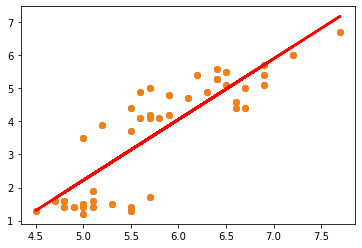

In [96]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y1, color="red", lw=2.5)
plt.show()